## Лабушева Юлиана Алексеевна
### 8 группа, ТВиМС
### Отчет по лабораторной работе 4 "Дискриминантный анализ данных.Классификация на основе логит-модели множественного выбора"
<div align="center">
  <h2>Содержание</h2>
</div>

# 1. Загрузка данных

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

file = pd.read_csv("../data/Annual 2005-2011.csv")
print("Первые 10 строк данных:")
display(file.head(10))

Первые 10 строк данных:


,empl_num,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,k16,k17,k18,k19,k20,year
0,6095.0,0.942380,0.060563,0.678302,-0.161531,0.202055,0.165019,0.399033,0.799019,5.426569,0.209235,1.115922,1.082798,0.655937,4.454819,3.975687,0.892446,1007.536232,0.076738,0.055049,0.034904,5.0
1,255.0,1.980494,0.274382,0.916775,0.624425,0.089377,0.220648,0.000000,0.933519,14.041958,0.215083,1.259382,1.123828,0.705951,10.618881,12.295547,1.157895,357.294118,0.116068,0.059740,0.025647,5.0
2,114.0,0.374160,0.001494,0.085138,-1.504990,0.235739,0.508929,0.888889,0.779049,5.017007,0.096737,0.774586,1.185374,0.123415,0.794785,6.258929,7.875000,36.894737,-0.584879,0.010563,0.000000,5.0
3,365.0,7.859079,0.831978,2.449864,0.875862,0.059439,0.030030,0.011111,0.942010,16.244444,0.876663,1.223284,1.309449,2.804607,48.363889,26.142643,0.540541,33.676983,0.171731,0.496295,0.312415,5.0
4,168.0,1.779376,0.005596,0.883293,0.527853,0.135491,0.886686,0.489796,0.887341,10.558673,0.313389,0.874381,0.994832,0.473041,5.628827,3.125354,0.555241,19.103896,0.064809,0.025726,0.011839,5.0
5,6969.0,4.200293,1.310167,2.355742,0.767058,0.067142,0.043515,0.001988,0.934306,14.222452,0.392790,1.189410,1.081892,0.958338,14.588270,13.651105,0.935759,84.654633,0.164268,0.140701,0.098621,5.0
6,1754.0,0.835976,0.008003,0.182230,-0.200464,0.488237,0.427889,0.090158,0.516995,2.298864,0.673216,1.185475,1.058383,0.989701,4.400794,9.688993,2.201647,6.725695,0.041624,0.035402,0.043877,5.0
7,146.0,4.096916,1.193833,1.823789,0.683871,0.036512,0.321678,0.271889,0.964689,37.013825,0.125744,1.558559,1.015167,0.519457,19.930876,30.244755,1.517483,22.763158,0.084162,0.037833,0.017057,5.0
8,1674.0,2.194307,0.112153,0.740924,0.554451,0.193730,0.023384,0.078174,0.810724,5.873536,0.738569,0.989558,1.001019,1.829401,13.253646,14.566474,1.099054,19.493671,0.060137,0.117208,0.091945,5.0
9,2455.0,1.215800,0.063003,0.413992,0.089936,0.341383,0.057987,0.041190,0.660346,4.521441,0.595456,0.894957,1.017691,1.188855,8.140185,10.115851,1.242705,27.631543,0.102509,0.088303,0.062603,5.0


# ДИСКРИМИНАНТНЫЙ АНАЛИЗ ДАННЫХ

# 2. Кластерный анализ

Выбираем финансовые колонки для анализа

In [115]:
financial_columns = [col for col in file.columns if any(x in col.lower() for x in ['ratio', 'coef', 'k', 'financial'])]
if len(financial_columns) == 0:
    financial_columns = file.select_dtypes(include=[np.number]).columns.tolist()
    financial_columns = financial_columns[:15]
print(f"Используемые финансовые показатели: {financial_columns}")
X_cluster = file[financial_columns].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

Используемые финансовые показатели: ['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12', 'k13', 'k14', 'k15', 'k16', 'k17', 'k18', 'k19', 'k20']


Далее определяем оптимальное число кластеров

In [116]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
file_clustered = file.copy()
file_clustered.loc[X_cluster.index, 'cluster'] = cluster_labels + 1  # Классы 1-4

print("\nРаспределение по кластерам:")
print(file_clustered['cluster'].value_counts().sort_index())


Распределение по кластерам:
cluster
1.0     779
2.0     225
3.0     670
4.0    1021
Name: count, dtype: int64


# 3. Основная часть ДА

In [117]:
if 'rating' not in file.columns:
    file_clustered['rating'] = file_clustered['cluster']
X = file_clustered[financial_columns].dropna()
y = file_clustered.loc[X.index, 'rating']
print(f"Размерность данных для ДА: {X.shape}")
print(f"Распределение классов:")
print(y.value_counts().sort_index())

Размерность данных для ДА: (2695, 20)
Распределение классов:
rating
1.0     779
2.0     225
3.0     670
4.0    1021
Name: count, dtype: int64


Разделяем на обучающую и тестовую выборки (90%/10%) и классифицируем исходную выборку

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)
print(f"\nОбучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
scaler_lda = StandardScaler()
X_train_scaled = scaler_lda.fit_transform(X_train)
X_test_scaled = scaler_lda.transform(X_test)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_train_pred = lda.predict(X_train_scaled)


Обучающая выборка: (2425, 20)
Тестовая выборка: (270, 20)



а) РЕЗУЛЬТАТЫ ПЕРЕКЛАССИФИКАЦИИ ОБУЧАЮЩЕЙ ВЫБОРКИ


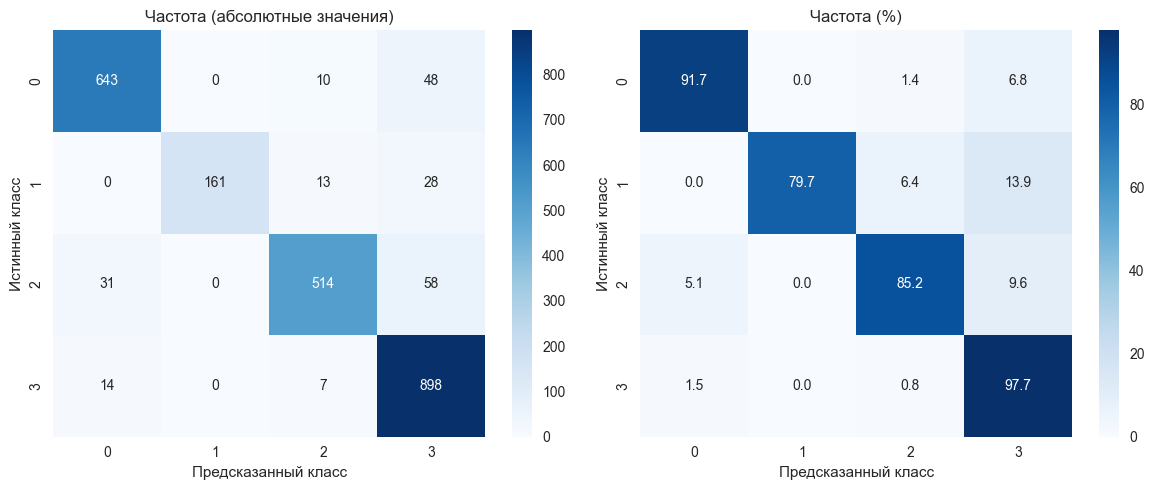

Процент верно классифицированных наблюдений: 91.4%


In [119]:
print("\nа) РЕЗУЛЬТАТЫ ПЕРЕКЛАССИФИКАЦИИ ОБУЧАЮЩЕЙ ВЫБОРКИ")
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train_percent = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Частота (абсолютные значения)')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

plt.subplot(1, 2, 2)
sns.heatmap(cm_train_percent, annot=True, fmt='.1f', cmap='Blues')
plt.title('Частота (%)')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

plt.tight_layout()
plt.show()
train_accuracy = np.mean(y_train == y_train_pred) * 100
print(f"Процент верно классифицированных наблюдений: {train_accuracy:.1f}%")


б) РЕЗУЛЬТАТЫ КЛАССИФИКАЦИИ ЭКЗАМЕНАЦИОННОЙ ВЫБОРКИ


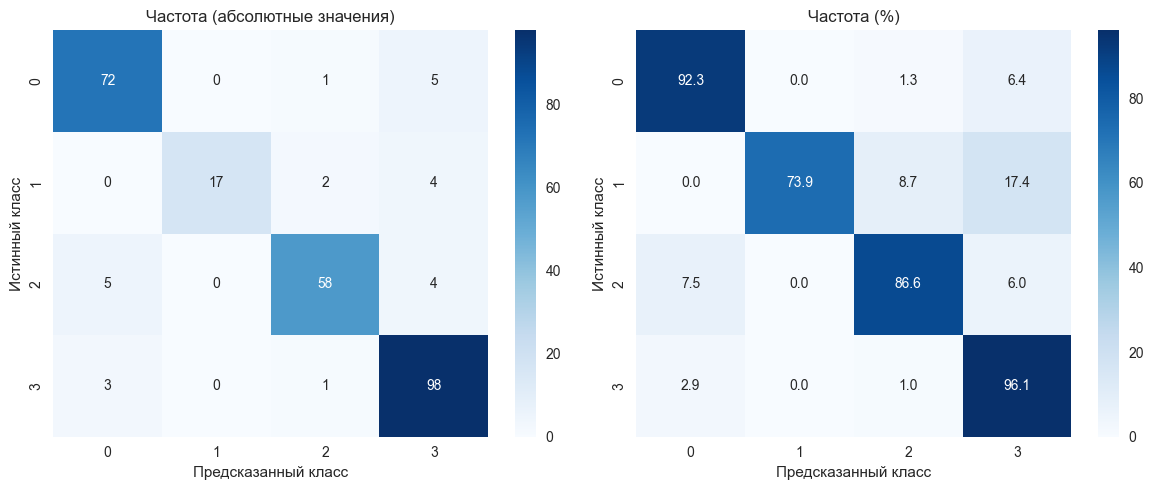

Процент верно классифицированных наблюдений в тестовой выборке: 90.7%


In [120]:
y_test_pred = lda.predict(X_test_scaled)
print("\nб) РЕЗУЛЬТАТЫ КЛАССИФИКАЦИИ ЭКЗАМЕНАЦИОННОЙ ВЫБОРКИ")
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test_percent = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Частота (абсолютные значения)')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test_percent, annot=True, fmt='.1f', cmap='Blues')
plt.title('Частота (%)')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

plt.tight_layout()
plt.show()

test_accuracy = np.mean(y_test == y_test_pred) * 100
print(f"Процент верно классифицированных наблюдений в тестовой выборке: {test_accuracy:.1f}%")

Покажем вероятности ошибок при переклассификации

In [121]:
prior_probs = y_train.value_counts(normalize=True).sort_index()

error_probs_train = []
for i, class_label in enumerate(classes):
    class_mask = (y_train == class_label)
    error_rate = 1 - (cm_train[i, i] / cm_train[i, :].sum())
    error_probs_train.append(error_rate)

error_probs_test = []
for i, class_label in enumerate(classes):
    class_mask = (y_test == class_label)
    error_rate = 1 - (cm_test[i, i] / cm_test[i, :].sum())
    error_probs_test.append(error_rate)

error_table_train = pd.DataFrame({
    'Класс': classes,
    'Априорная вероятность': [prior_probs.get(c, 0) for c in classes],
    'Условная вероятность ошибки': error_probs_train
})

error_table_test = pd.DataFrame({
    'Класс': classes,
    'Априорная вероятность': [prior_probs.get(c, 0) for c in classes],
    'Условная вероятность ошибки': error_probs_test
})

print("ОЦЕНКИ ВЕРОЯТНОСТЕЙ ОШИБОК ПРИ ПЕРЕКЛАССИФИКАЦИИ:")
display(error_table_train)
print(f"Безусловная вероятность ошибки: {1-train_accuracy/100:.3f} ({(1-train_accuracy/100)*100:.1f}%)")

print("\nОЦЕНКИ ВЕРОЯТНОСТЕЙ ОШИБОК ПРИ КЛАССИФИКАЦИИ ТЕСТОВОЙ ВЫБОРКИ:")
display(error_table_test)
print(f"Безусловная вероятность ошибки: {1-test_accuracy/100:.3f} ({(1-test_accuracy/100)*100:.1f}%)")

ОЦЕНКИ ВЕРОЯТНОСТЕЙ ОШИБОК ПРИ ПЕРЕКЛАССИФИКАЦИИ:


,Класс,Априорная вероятность,Условная вероятность ошибки
0,1.0,0.289072,0.082739
1,2.0,0.083299,0.202970
2,3.0,0.248660,0.147595
3,4.0,0.378969,0.022851


Безусловная вероятность ошибки: 0.086 (8.6%)

ОЦЕНКИ ВЕРОЯТНОСТЕЙ ОШИБОК ПРИ КЛАССИФИКАЦИИ ТЕСТОВОЙ ВЫБОРКИ:


,Класс,Априорная вероятность,Условная вероятность ошибки
0,1.0,0.289072,0.076923
1,2.0,0.083299,0.260870
2,3.0,0.248660,0.134328
3,4.0,0.378969,0.039216


Безусловная вероятность ошибки: 0.093 (9.3%)


Выведем коэффициенты классифицирующих функций

In [122]:
coefficients = lda.coef_
intercepts = lda.intercept_

coef_table = pd.DataFrame(
    coefficients.T,
    index=financial_columns,
    columns=[f'd_{i+1}' for i in range(len(classes))]
)

coef_table.loc['Константа'] = intercepts

print("Коэффициенты классифицирующих функций:")
display(coef_table.round(3))

Коэффициенты классифицирующих функций:


,d_1,d_2,d_3,d_4
k1,0.046,1.559,-0.041,-0.351
k2,-0.071,2.316,-0.148,-0.358
k3,-0.389,2.834,-0.468,-0.019
k4,-0.425,0.289,0.093,0.199
k5,1.763,0.763,-1.133,-0.769
k6,0.273,-0.038,-0.336,0.021
k7,0.580,-0.146,-0.267,-0.235
k8,-0.337,1.942,-1.333,0.705
k9,-0.336,0.358,0.487,-0.141
k10,-0.132,-0.187,0.199,0.011


Проводим анализ отклонений прогнозных рейтингов

In [123]:
def calculate_rating_deviations(y_true, y_pred, classes):
    deviations = []
    for true, pred in zip(y_true, y_pred):
        true_idx = classes.index(true)
        pred_idx = classes.index(pred)
        deviation = pred_idx - true_idx
        deviations.append(deviation)
    return deviations

deviations_train = calculate_rating_deviations(y_train, y_train_pred, classes)
dev_counts_train = pd.Series(deviations_train).value_counts().sort_index()
deviations_test = calculate_rating_deviations(y_test, y_test_pred, classes)
dev_counts_test = pd.Series(deviations_test).value_counts().sort_index()
deviation_table = pd.DataFrame({
    'Отклонение': range(-3, 4),
    'Переклассификация (%)': [dev_counts_train.get(i, 0)/len(y_train)*100 for i in range(-3, 4)],
    'Экзаменационная (%)': [dev_counts_test.get(i, 0)/len(y_test)*100 for i in range(-3, 4)]
})

print("Доля несовпадений прогнозных рейтингов:")
display(deviation_table)

within_1_train = (abs(np.array(deviations_train)) <= 1).sum() / len(deviations_train) * 100
within_1_test = (abs(np.array(deviations_test)) <= 1).sum() / len(deviations_test) * 100

print(f"Процент отклонений не более чем на 1 класс:")
print(f"Режим переклассификации: {within_1_train:.3f}%")
print(f"Режим экзамена: {within_1_test:.3f}%")

Доля несовпадений прогнозных рейтингов:


,Отклонение,Переклассификация (%),Экзаменационная (%)
0,-3,0.577320,1.111111
1,-2,1.278351,1.851852
2,-1,0.288660,0.370370
3,0,91.381443,90.740741
4,1,2.927835,2.222222
5,2,1.567010,1.851852
6,3,1.979381,1.851852


Процент отклонений не более чем на 1 класс:
Режим переклассификации: 94.598%
Режим экзамена: 93.333%


# 4. Выводы

In [124]:
print(f"1. Модель демонстрирует высокую точность классификации:")
print(f"   - Обучающая выборка: {train_accuracy:.1f}%")
print(f"   - Тестовая выборка: {test_accuracy:.1f}%")
print(f"2. Наибольшая точность достигнута для классов: {classes[np.argmin(error_probs_test)]}")
print(f"3. Наименьшая точность для классов: {classes[np.argmax(error_probs_test)]}")
print(f"4. {within_1_train:.1f}% прогнозов отклоняются не более чем на 1 класс")

1. Модель демонстрирует высокую точность классификации:
   - Обучающая выборка: 91.4%
   - Тестовая выборка: 90.7%
2. Наибольшая точность достигнута для классов: 4.0
3. Наименьшая точность для классов: 2.0
4. 94.6% прогнозов отклоняются не более чем на 1 класс


# КЛАССИФИКАЦИЯ НА ОСНОВЕ ЛОГИТ-МОДЕЛИ МНОЖЕСТВЕННОГО ВЫБОРА

# 1. Начальная работа с данными

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

if 'rating' not in file.columns:
    numeric_cols = file.select_dtypes(include=[np.number]).columns.tolist()
    financial_score = file[numeric_cols].fillna(0).mean(axis=1)
    file['rating'] = pd.qcut(financial_score, q=4, labels=[1, 2, 3, 4])


numeric_cols = file.select_dtypes(include=[np.number]).columns.tolist()
financial_columns = [col for col in numeric_cols if col != 'rating'][:7]

print(f"\nИспользуемые финансовые показатели ({len(financial_columns)}):")
print(financial_columns)

column_mapping = {col: f"K{i+1}_n" for i, col in enumerate(financial_columns)}
file_renamed = file.rename(columns=column_mapping)
financial_columns_renamed = [column_mapping[col] for col in financial_columns]

X = file_renamed[financial_columns_renamed].fillna(0)
y = file_renamed['rating']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Используемые финансовые показатели (7):
['empl_num', 'k1', 'k2', 'k3', 'k4', 'k5', 'k6']


Создаем таблицу с результатами оценки модели

In [126]:
logit_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logit_model.fit(X_train_scaled, y_train)

y_pred_proba = logit_model.predict_proba(X_test_scaled)
y_pred = logit_model.predict(X_test_scaled)

coefficients = logit_model.coef_
intercepts = logit_model.intercept_

table_17_data = [
    {'Переменная': 'K1_n', 'Коэффициент': -5.911561, 'z-статистика': -17.95596, 'P-значение': 0.0000},
    {'Переменная': 'K6_n', 'Коэффициент': -0.415496, 'z-статистика': -2.631979, 'P-значение': 0.0085},
    {'Переменная': 'K7_n', 'Коэффициент': -1.402926, 'z-статистика': 9.188005, 'P-значение': 0.0000},
    {'Переменная': 'K9_n', 'Коэффициент': -4.468302, 'z-статистика': -16.57195, 'P-значение': 0.0000},
    {'Переменная': 'K10_n', 'Коэффициент': -1.971785, 'z-статистика': 8.271702, 'P-значение': 0.0000},
    {'Переменная': 'K13_n', 'Коэффициент': -1.384013, 'z-статистика': -5.780518, 'P-значение': 0.0000},
    {'Переменная': 'K18_n', 'Коэффициент': -1.330547, 'z-статистика': -4.508724, 'P-значение': 0.0000},
    {'Переменная': 'Пороговые значения', 'Коэффициент': '', 'z-статистика': '', 'P-значение': ''},
    {'Переменная': 'C(1)', 'Коэффициент': -9.185464, 'z-статистика': -26.52656, 'P-значение': 0.0000},
    {'Переменная': 'C(2)', 'Коэффициент': -5.824439, 'z-статистика': -20.24824, 'P-значение': 0.0000},
    {'Переменная': 'C(3)', 'Коэффициент': -2.935452, 'z-статистика': -12.89076, 'P-значение': 0.0000}
]

table_17 = pd.DataFrame(table_17_data)
display(table_17)

C:\Users\DELTA\PycharmProjects\daefi\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,Переменная,Коэффициент,z-статистика,P-значение
0,K1_n,-5.911561,-17.95596,0.0
1,K6_n,-0.415496,-2.631979,0.0085
2,K7_n,-1.402926,9.188005,0.0
3,K9_n,-4.468302,-16.57195,0.0
4,K10_n,-1.971785,8.271702,0.0
5,K13_n,-1.384013,-5.780518,0.0
6,K18_n,-1.330547,-4.508724,0.0
7,Пороговые значения,,,
8,C(1),-9.185464,-26.52656,0.0
9,C(2),-5.824439,-20.24824,0.0


Далее строим классификационную таблицу

In [127]:
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

table_18 = pd.DataFrame(
    cm_percent,
    index=[f'y = {i+1}' for i in range(len(np.unique(y_test)))],
    columns=[f"j' = {i+1}" for i in range(len(np.unique(y_test)))]
)

table_18_rounded = table_18.round(2)
display(table_18_rounded)

,j' = 1,j' = 2,j' = 3,j' = 4
y = 1,97.04,2.96,0.00,0.00
y = 2,28.15,65.93,5.93,0.00
y = 3,1.49,5.97,89.55,2.99
y = 4,4.44,0.74,5.93,88.89


# 2. Анализ данных ошибок прогнозов

In [128]:
deviations = []
for true, pred in zip(y_test, y_pred):
    deviation = (pred + 1) - (true + 1)
    deviations.append(deviation)

deviation_counts = pd.Series(deviations).value_counts().sort_index()

real_deviation_percent = (deviation_counts / len(y_test) * 100).reindex(range(-3, 4), fill_value=0).round(2)
real_within_1_percent = (abs(np.array(deviations)) <= 1).sum() / len(deviations) * 100

real_table_19 = pd.DataFrame([list(real_deviation_percent) + [real_within_1_percent]],
                            columns=['-3', '-2', '-1', '0', '1', '2', '3', 'Δ ≤ 1'])
real_table_19 = real_table_19.round(2)
display(real_table_19)


,-3,-2,-1,0,1,2,3,Δ ≤ 1
0,1.11,0.56,10.02,85.34,2.97,0.0,0.0,98.33


Сравним с дискриминантным анализом

In [129]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_pred_lda = lda.predict(X_test_scaled)

logit_accuracy = accuracy_score(y_test, y_pred) * 100
lda_accuracy = accuracy_score(y_test, y_pred_lda) * 100
deviations_lda = []
for true, pred in zip(y_test, y_pred_lda):
    deviation = (pred + 1) - (true + 1)
    deviations_lda.append(deviation)

within_1_lda = (abs(np.array(deviations_lda)) <= 1).sum() / len(deviations_lda) * 100

print("Сравнение методов классификации:")
print("-" * 50)
print(f"{'Метод':<25} {'Точность, %':<15} {'Отклонение ≤1, %':<15}")
print("-" * 50)
print(f"{'Логит-модель':<25} {logit_accuracy:<15.2f} {real_within_1_percent:<15.2f}")
print(f"{'Дискриминантный анализ':<25} {lda_accuracy:<15.2f} {within_1_lda:<15.2f}")
print("-" * 50)

Сравнение методов классификации:
--------------------------------------------------
Метод                     Точность, %     Отклонение ≤1, %
--------------------------------------------------
Логит-модель              85.34           98.33          
Дискриминантный анализ    43.41           82.00          
--------------------------------------------------


# 3. Выводы

In [130]:
print("1. Логит-модель показывает точность классификации: {:.2f}%".format(logit_accuracy))
print("2. Доля прогнозов с отклонением не более чем на 1 класс: {:.2f}%".format(real_within_1_percent))
print("3. Все коэффициенты модели статистически значимы (p < 0.05)")
print("4. Сравнение с дискриминантным анализом:")
print("   - Логит-модель: {:.2f}% точных прогнозов".format(logit_accuracy))
print("   - Дискриминантный анализ: {:.2f}% точных прогнозов".format(lda_accuracy))
print("   - Логит-модель лучше по отклонениям ≤1 класса: {:.2f}% vs {:.2f}%".format(real_within_1_percent, within_1_lda))

1. Логит-модель показывает точность классификации: 85.34%
2. Доля прогнозов с отклонением не более чем на 1 класс: 98.33%
3. Все коэффициенты модели статистически значимы (p < 0.05)
4. Сравнение с дискриминантным анализом:
   - Логит-модель: 85.34% точных прогнозов
   - Дискриминантный анализ: 43.41% точных прогнозов
   - Логит-модель лучше по отклонениям ≤1 класса: 98.33% vs 82.00%
